In [3]:
import pandas as pd
import numpy as np

'''
8(a). read the data
8(b). look at the data
'''
College = pd.read_csv('Data/College.csv')
College.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
'''
8(c)i. produce a numerical summary of the variables in the dataset
'''
College.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


Index([u'Unnamed: 0', u'Private', u'Apps', u'Accept', u'Enroll', u'Top10perc',
       u'Top25perc', u'F.Undergrad', u'P.Undergrad', u'Outstate',
       u'Room.Board', u'Books', u'Personal', u'PhD', u'Terminal', u'S.F.Ratio',
       u'perc.alumni', u'Expend', u'Grad.Rate'],
      dtype='object')


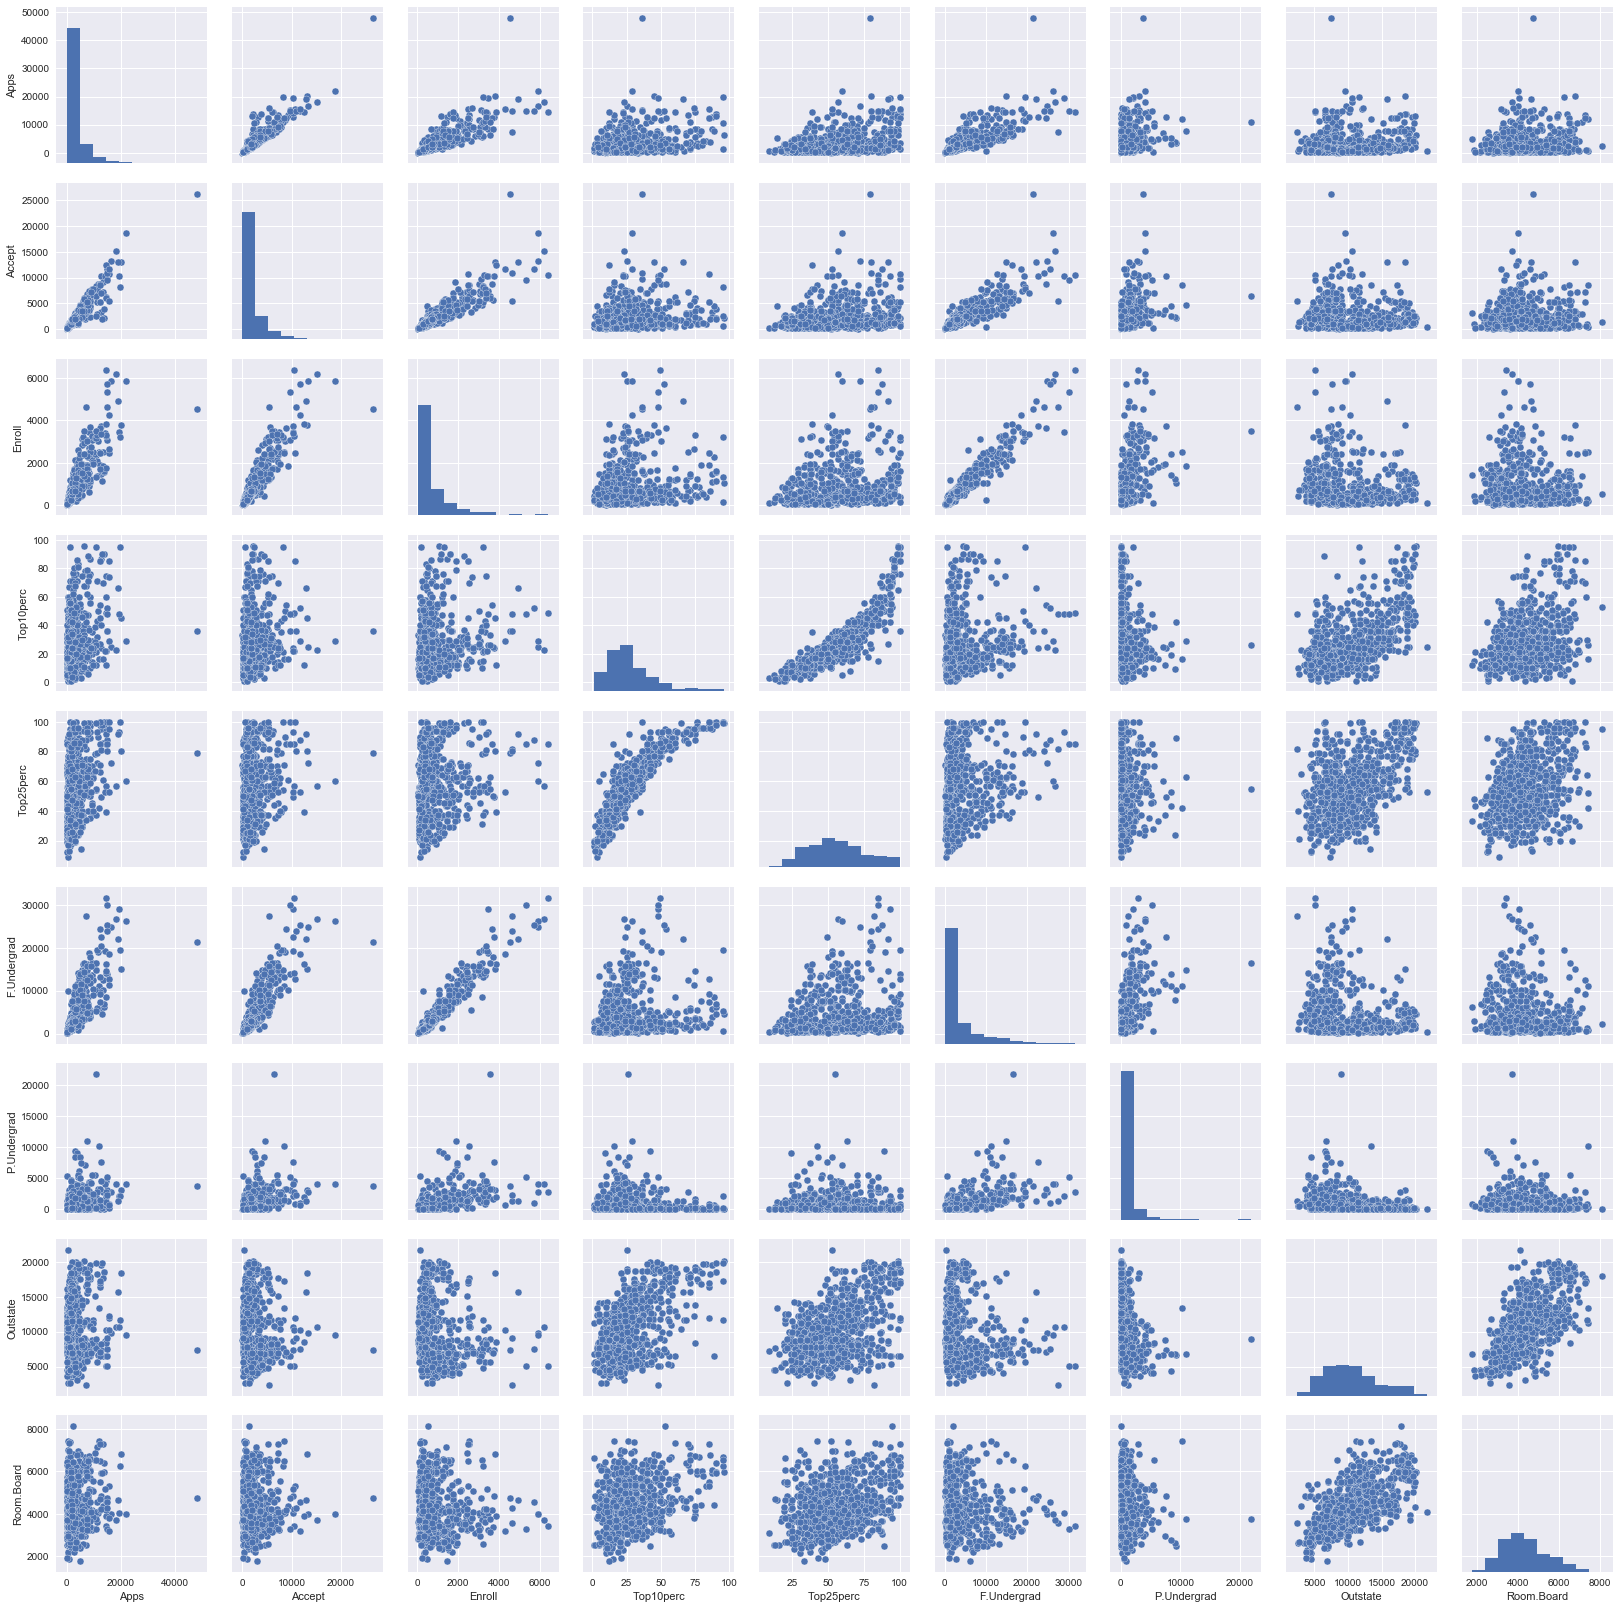

In [13]:
%matplotlib inline
import seaborn as sns
'''
8(c)ii. scatterplot matrix of the first 10 columns of the data
'''
print (College.columns)

Subset = College[College.columns[1:11]]
sns.pairplot(Subset)

   Outstate Private
0      7440     Yes
1     12280     Yes
2     11250     Yes
3     12960     Yes
4      7560     Yes


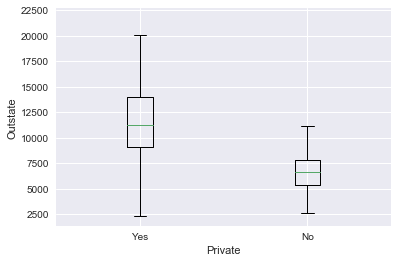

In [21]:
import matplotlib.pyplot as plt
'''
8(c)iii. Boxplot of Outstate vs. Private
'''
print(College[['Outstate', 'Private']].head())

plt.boxplot([College[College.Private=='Yes'].Outstate, College[College.Private=='No'].Outstate])
plt.xlabel("Private")
plt.ylabel("Outstate")
plt.xticks(range(1, 3), ['Yes', 'No'])
plt.show()

count     777
unique      2
top        No
freq      699
Name: Elite, dtype: object


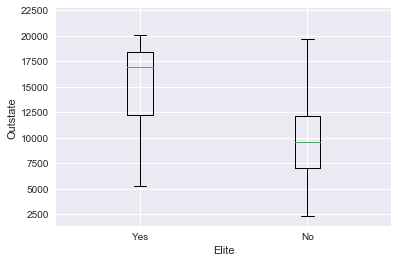

In [26]:
'''
8(c)iv. Create 'Elite' variable by binning Top10perc.
Based on whether students coming from top 10% of their high school exceeds 50% or not.
'''
College['Elite'] = College.Top10perc.apply(lambda x: 'Yes' if x > 50 else 'No')
print(College.Elite.describe())

plt.boxplot([College[College.Elite=='Yes'].Outstate, College[College.Elite=='No'].Outstate])
plt.xlabel("Elite")
plt.ylabel("Outstate")
plt.xticks(range(1, 3), ['Yes', 'No'])
plt.show()

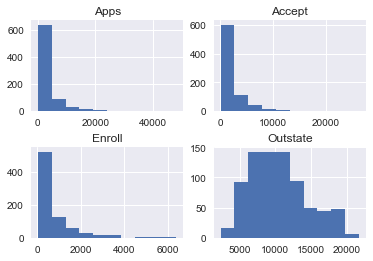

In [35]:
'''
8(c)v. Some histograms for quantitative variables
'''
fig, axes = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.4)
axes[0, 0].hist(College.Apps)
axes[0, 0].set_title("Apps")
axes[0, 1].hist(College.Accept)
axes[0, 1].set_title("Accept")
axes[1, 0].hist(College.Enroll)
axes[1, 0].set_title("Enroll")
axes[1, 1].hist(College.Outstate)
axes[1, 1].set_title("Outstate")

In [36]:
'''
Auto dataset
9(a). which predictors are quantitative, which are qualitative?
'''
Auto = pd.read_csv('Data/Auto.csv')
Auto.head()
# quantitative: mpg, displacement, weight, acceleration
# qualitative: cylinders, horsepower, year, origin, name

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [39]:
'''
9(b). range, mean and standard deviation of each quantative predictor
'''
Auto[['mpg', 'displacement', 'weight', 'acceleration']].describe()

,mpg,displacement,weight,acceleration
count,397.000000,397.000000,397.000000,397.000000
mean,23.515869,193.532746,2970.261965,15.555668
std,7.825804,104.379583,847.904119,2.749995
min,9.000000,68.000000,1613.000000,8.000000
25%,17.500000,104.000000,2223.000000,13.800000
50%,23.000000,146.000000,2800.000000,15.500000
75%,29.000000,262.000000,3609.000000,17.100000
max,46.600000,455.000000,5140.000000,24.800000
